# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
players = pd.read_csv("../data/players.csv")
competitions = pd.read_csv("../data/competitions.csv")
clubs = pd.read_csv("../data/clubs.csv")

# Datenbereinigung "players"

In [3]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             32601 non-null  int64  
 1   first_name                            30539 non-null  object 
 2   last_name                             32601 non-null  object 
 3   name                                  32601 non-null  object 
 4   last_season                           32601 non-null  int64  
 5   current_club_id                       32601 non-null  int64  
 6   player_code                           32601 non-null  object 
 7   country_of_birth                      29802 non-null  object 
 8   city_of_birth                         30146 non-null  object 
 9   country_of_citizenship                32218 non-null  object 
 10  date_of_birth                         32554 non-null  object 
 11  sub_position   

In [4]:
players.isna().sum()

player_id                                   0
first_name                               2062
last_name                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_birth                         2799
city_of_birth                            2455
country_of_citizenship                    383
date_of_birth                              47
sub_position                              180
position                                    0
foot                                     2536
height_in_cm                             2256
contract_expiration_date                12091
agent_name                              16019
image_url                                   0
url                                         0
current_club_domestic_competition_id        0
current_club_name                           0
market_value_in_eur               

In [5]:
(players == " ").sum()

player_id                               0
first_name                              0
last_name                               0
name                                    0
last_season                             0
current_club_id                         0
player_code                             0
country_of_birth                        0
city_of_birth                           0
country_of_citizenship                  0
date_of_birth                           0
sub_position                            0
position                                0
foot                                    0
height_in_cm                            0
contract_expiration_date                0
agent_name                              0
image_url                               0
url                                     0
current_club_domestic_competition_id    0
current_club_name                       0
market_value_in_eur                     0
highest_market_value_in_eur             0
number_of_transfers               

## 'first_name' & 'last_name'

In [6]:
players[players["first_name"].isna()].sort_values(by=["market_value_in_eur"], ascending=False)[["first_name", "last_name"]]

,first_name,last_name
19985,NaN,Vinicius Junior
31174,NaN,Lamine Yamal
19513,NaN,Rodri
28014,NaN,Pedri
21468,NaN,Rodrygo
...,...,...
32181,NaN,Italo
32274,NaN,Marlon Maranhão
32320,NaN,Leonardo Casaes
32361,NaN,Peixinho


- Vor und Nachname sind zusammengetragen und in 'last_name' drinne
- jedoch nicht so wichtig für die Regression
- widerum gibt es Spieler, die deren Spitzname nur hier als 'last_name' haben (Bsp.: Rodri, ausgeschrieben: Rodrigo Hernández Cascante)

In [7]:
players["first_name"] = players["first_name"].fillna("look_last_name")

## 'last_season'

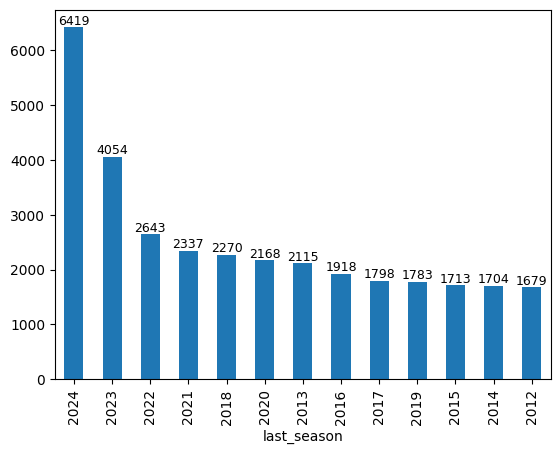

In [8]:
ax = players.last_season.value_counts().sort_values(ascending=False).plot(kind="bar")

for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=9, rotation=0
    )

plt.show()

- 'last_season' sieht gut aus - hat keine fehlende oder falsche Werte
- zudem sieht die Verteilung gut aus (Konzentration auf eher aktuelle Spieler)

## 'current_club_id'

In [9]:
players["current_club_id"].isna().sum()

np.int64(0)

- alle haben eine ID für deren aktuellen (zuletzt aktuellen) Club

## 'country_of_birth' & 'city_of_birth' & 'country_of_citizenship'

- 'country_of_birth' kann entfernt werden, weil beim Fußball wichtiger ist, bei welcher Nationalmannschaft man sppiel ('country_of_citizenship')
- 'city_of_birth' kann als hilfe genommen werden, um die felende Länder zu füllen

### country of birth nehmen und als country of citizenship nehmen

In [10]:
players[(players["country_of_birth"].notna()) & (players["country_of_citizenship"].isna())]

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,total_transfer_fee,total_starting_lineups,total_substitute_appearances,total_captain_appearances,total_games,total_yellow_cards,total_red_cards,total_goals,total_assists,total_minutes_played
18936,345068,Abdullah,Karakoc,Abdullah Karakoc,2014,3216,abdullah-karakoc,Germany,Köln,NaN,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [11]:
players["country_of_citizenship"] = players["country_of_citizenship"].fillna(players["country_of_birth"])

hier wird der die Nationalität vom Geburtsland genommen; In Summe nur 1.

In [12]:
players = players.drop(columns=["country_of_birth"], axis=1)

### durch city_of_birth das Land für country_of_citizenship ermitteln

Externer Datensatz gesetzt:
- https://www.kaggle.com/datasets/juanmah/world-cities?resource=download

Beinhaltet viele Städte und deren Länder

In [13]:
worldcities = pd.read_csv("../data/worldcities.csv", usecols=["city", "country"])
worldcities.head()

,city,country
0,Tokyo,Japan
1,Jakarta,Indonesia
2,Delhi,India
3,Guangzhou,China
4,Mumbai,India


In [14]:
worldcities.value_counts()

city              country      
Springfield       United States    11
Washington        United States    11
Middletown        United States    10
Franklin          United States     9
Monroe            United States     9
                                   ..
Hasselt           Belgium           1
Hassi Bahbah      Algeria           1
Hassi Fedoul      Algeria           1
Hassi Khelifa     Algeria           1
’s-Hertogenbosch  Netherlands       1
Name: count, Length: 45863, dtype: int64

In [15]:
city_country = (worldcities.drop_duplicates(subset="city", keep="first")[["city", "country"]])

In [16]:
players[players["country_of_citizenship"].isna() & players["city_of_birth"].notna()]

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,city_of_birth,country_of_citizenship,date_of_birth,...,total_transfer_fee,total_starting_lineups,total_substitute_appearances,total_captain_appearances,total_games,total_yellow_cards,total_red_cards,total_goals,total_assists,total_minutes_played
325,4311,Maarten,Stekelenburg,Maarten Stekelenburg,2022,610,maarten-stekelenburg,Haarlem,NaN,1982-09-22 00:00:00,...,0,93,238,0,331,4.0,0.0,0.0,0.0,10251.0
389,4742,Christophe,Lepoint,Christophe Lepoint,2022,2715,christophe-lepoint,Brussel,NaN,1984-10-24 00:00:00,...,0,155,63,49,218,36.0,1.0,24.0,23.0,15864.0
1372,16101,Atiba,Hutchinson,Atiba Hutchinson,2022,114,atiba-hutchinson,"Brampton, Ontario",NaN,1983-02-08 00:00:00,...,0,283,49,94,332,39.0,0.0,27.0,44.0,29121.0
1846,22328,Fabio,Quagliarella,Fabio Quagliarella,2022,1038,fabio-quagliarella,Castellammare di Stabia,NaN,1983-01-31 00:00:00,...,0,264,128,152,392,21.0,0.0,131.0,37.0,24765.0
2049,24316,Emiliano,Viviano,Emiliano Viviano,2022,6646,emiliano-viviano,Fiesole,NaN,1985-12-01 00:00:00,...,0,218,32,25,250,22.0,0.0,0.0,0.0,22407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31228,944355,Mathieu,Acapandié,Mathieu Acapandié,2022,995,mathieu-acapandie,Saint-Pierre,NaN,2004-12-14 00:00:00,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
31891,1047557,Mert,Dinc,Mert Dinc,2022,3205,mert-dinc,Kayseri,NaN,2005-03-17 00:00:00,...,0,0,6,0,6,0.0,0.0,0.0,0.0,0.0
31910,1048097,Yagiz Efe,Erataman,Yagiz Efe Erataman,2022,6890,yagiz-efe-erataman,Istanbul,NaN,2005-08-18 00:00:00,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
32249,1116069,Vitaliy,Morokhovets,Vitaliy Morokhovets,2022,10690,vitaliy-morokhovets,"Perevalne, AR Krym",NaN,2003-06-30 00:00:00,...,0,0,10,0,10,0.0,0.0,0.0,0.0,0.0


In [17]:
players = players.merge(
    city_country,
    how="left",
    left_on="city_of_birth",
    right_on="city"
)

In [18]:
players["country_of_citizenship"] = players["country_of_citizenship"].fillna(players["country"])

In [19]:
players["country_of_citizenship"].isna().sum()

np.int64(124)

208 von 332 konnte befüllt werden, der Rest wird mit "Unknown" befüllt

### nicht zuweisbares Land mit Unknown zuweisen

In [20]:
players["country_of_citizenship"] = players["country_of_citizenship"].fillna("Unknown")

In [21]:
players["country_of_citizenship"].isna().sum()

np.int64(0)

### fehlende Städte befüllen mit Modus vom jeweiligen Land

In [22]:
most_common_city = (
    players.dropna(subset=["city_of_birth"])
    .groupby("country_of_citizenship")["city_of_birth"]
    .agg(lambda x: x.mode()[0])
)

In [23]:
mapping = most_common_city.to_dict()

In [24]:
players["city_of_birth"] = players.apply(
    lambda row: mapping.get(row["country_of_citizenship"], row["city_of_birth"])
    if pd.isna(row["city_of_birth"]) else row["city_of_birth"],
    axis=1
)

In [25]:
players["city_of_birth"].isna().sum()

np.int64(0)

### hilfs Spalte 'country' & 'city' entfernen

In [26]:
players = players.drop(columns=["city", "country"], axis=1)

### Plotten der Werte

In [27]:
players.country_of_citizenship.value_counts()

country_of_citizenship
Spain                        1977
Italy                        1895
France                       1787
Brazil                       1652
England                      1588
                             ... 
Bosnia and Herzegovina          1
Réunion                         1
Seychelles                      1
Turkmenistan                    1
Saint Pierre and Miquelon       1
Name: count, Length: 189, dtype: int64

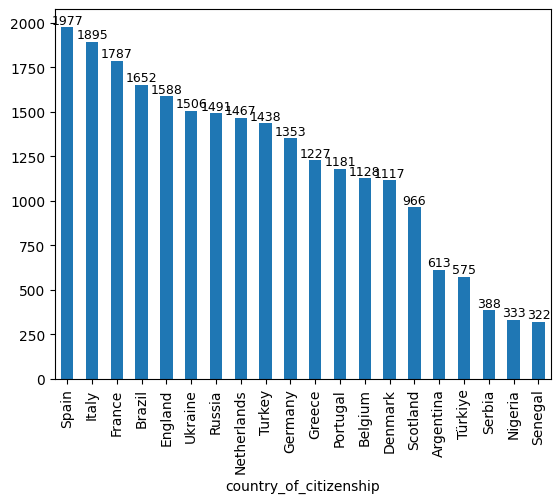

In [28]:
ax = players.country_of_citizenship.value_counts() \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind="bar")

for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=9, rotation=0
    )

plt.show()

### Türkei in einer Schreibweise bringen

In [29]:
players.loc[players["country_of_citizenship"] == "Türkiye", "country_of_citizenship"] = "Turkey"

### Alle die weniger als 10 mal vorkommen --> zu Rest der Welt ändern

In [30]:
players.loc[players["country_of_citizenship"].isin(
    players["country_of_citizenship"].value_counts()[players["country_of_citizenship"].value_counts() <= 10].index), "country_of_citizenship"] = "rest of the world"

In [31]:
players.country_of_citizenship.value_counts()

country_of_citizenship
Turkey                2013
Spain                 1977
Italy                 1895
France                1787
Brazil                1652
                      ... 
Burundi                 14
Kenya                   13
Bolivia                 13
Dominican Republic      13
Philippines             12
Name: count, Length: 122, dtype: int64

## 'date_of_birth"

Aus 'date_of_birth' kann man das Alter des Spieler bestimmen --> neue Spalte erstellen

### fehlende Geburtage entfernen

In [32]:
players[players["date_of_birth"].isna()]["last_season"].value_counts()

last_season
2014    9
2015    6
2017    6
2012    5
2013    5
2016    4
2019    3
2022    3
2020    2
2023    2
2018    1
2021    1
Name: count, dtype: int64

In [33]:
players = players.dropna(subset=["date_of_birth"])

### umwandeln zu datetime

In [34]:
players["date_of_birth"].head()

0    1978-06-09 00:00:00
1    1980-08-06 00:00:00
2    1981-01-30 00:00:00
3    1978-05-08 00:00:00
4    1981-03-18 00:00:00
Name: date_of_birth, dtype: object

In [35]:
players["date_of_birth"] = pd.to_datetime(players["date_of_birth"]).dt.date
players["date_of_birth"].head()

0    1978-06-09
1    1980-08-06
2    1981-01-30
3    1978-05-08
4    1981-03-18
Name: date_of_birth, dtype: object

## 'sub_position'

In [36]:
players["sub_position"].value_counts()

sub_position
Centre-Back           5738
Centre-Forward        4572
Central Midfield      3779
Goalkeeper            3712
Defensive Midfield    2657
Right-Back            2364
Left-Back             2277
Attacking Midfield    2219
Left Winger           2102
Right Winger          2001
Left Midfield          377
Right Midfield         345
Second Striker         236
Name: count, dtype: int64

In [37]:
players["sub_position"] = players["sub_position"].fillna("No Sub Position")

## 'position'

In [38]:
players["position"].value_counts()

position
Defender      10379
Midfield       9377
Attack         8911
Goalkeeper     3712
Missing         175
Name: count, dtype: int64

## 'foot'

In [39]:
players["foot"].value_counts()

foot
right    21133
left      7519
both      1380
Name: count, dtype: int64

In [40]:
players["foot"] = players["foot"].fillna("Unknown")

## 'height_in_cm'

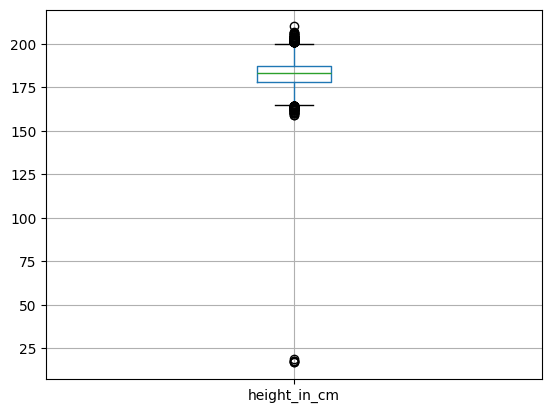

In [41]:
players.boxplot(column="height_in_cm")
plt.show()

In [42]:
players[players["height_in_cm"] < 50]["height_in_cm"]

25305    19.0
26004    18.0
26935    18.0
28403    17.0
30420    17.0
Name: height_in_cm, dtype: float64

In [43]:
players.loc[players["height_in_cm"] < 50, "height_in_cm"] *= 10

In [44]:
players["height_in_cm"] = (
    players
    .groupby("position")["height_in_cm"]
    .transform(lambda x: x.fillna(x.median()))
)

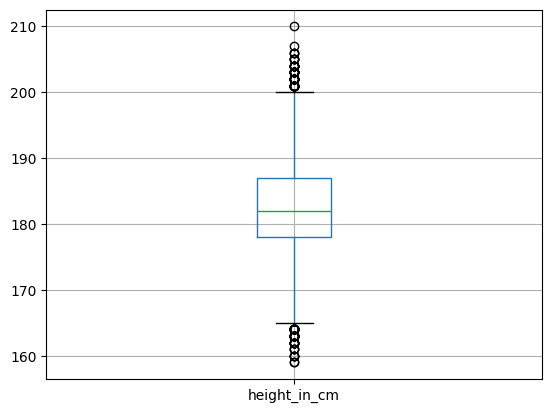

In [45]:
players.boxplot(column="height_in_cm")
plt.show()

## 'contract_expiration_date'

In [49]:
players[players["contract_expiration_date"].notna()].head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,city_of_birth,country_of_citizenship,date_of_birth,...,total_transfer_fee,total_starting_lineups,total_substitute_appearances,total_captain_appearances,total_games,total_yellow_cards,total_red_cards,total_goals,total_assists,total_minutes_played
9,215,Roque,Santa Cruz,Roque Santa Cruz,2015,1084,roque-santa-cruz,Asunción,Paraguay,1981-08-16,...,0,41,34,1,75,3.0,0.0,26.0,8.0,6038.0
98,2138,Mladen,Kascelan,Mladen Kascelan,2017,40426,mladen-kascelan,Kotor,Montenegro,1983-02-13,...,0,46,7,11,53,22.0,0.0,1.0,0.0,4951.0
122,2857,Eldin,Jakupovic,Eldin Jakupovic,2022,29,eldin-jakupovic,Kozarac,Switzerland,1984-10-02,...,0,35,72,0,107,0.0,0.0,0.0,0.0,2837.0
150,3159,Valerio,Di Cesare,Valerio Di Cesare,2018,130,valerio-di-cesare,Roma,Italy,1983-05-23,...,0,9,1,2,10,3.0,0.0,0.0,0.0,763.0
188,3333,James,Milner,James Milner,2024,1237,james-milner,Leeds,England,1986-01-04,...,44400000,237,211,91,448,69.0,1.0,38.0,69.0,25820.0


In [52]:
players["contract_expiration_date"].isna().sum()

np.int64(12053)

Da viele Werte fehlen und der Marktwert vielleicht eine Korrelation zu der Laufzeit eines Vertrages haben, wird dieser Wert in der '03_EDA' näher betrachtet.

## 'agent_name'

In [53]:
players["agent_name"].value_counts()

agent_name
Wasserman              504
CAA Stellar            374
ProStar                374
CAA Base Ltd           302
Unique Sports Group    256
                      ... 
Lilywhite                1
KSM 360                  1
Together For You         1
VM Sports                1
4FC                      1
Name: count, Length: 2896, dtype: int64

In [54]:
players["agent_name"].isna().sum()

np.int64(15980)

es fehlen sehr viele Werte und es gibt zu viele Varianten, die die Dimension ehöhren würde für die Regression - daher wird das Feature entfernt.

In [55]:
players = players.drop(columns=["agent_name"], axis=1)

## 'image_url' & 'url'

für den Marktwert überhaupt nicht relevant - daher werden diese beiden Features entfernt.

In [56]:
players = players.drop(columns=["image_url", "url"], axis=1)

## 'current_club_domestic_competition_id'

In [58]:
players["current_club_domestic_competition_id"].value_counts()

current_club_domestic_competition_id
TR1     3214
IT1     3178
PO1     2655
GR1     2600
FR1     2247
NL1     2232
BE1     2217
ES1     2216
RU1     2182
GB1     2181
UKR1    2055
SC1     2022
L1      1853
DK1     1702
Name: count, dtype: int64

In [59]:
players["current_club_domestic_competition_id"].isna().sum()

np.int64(0)

sieht gut aus, keine Anpassung notwendig

## 'current_club_name'

In [60]:
players.current_club_name.value_counts()

current_club_name
Kilmarnock Football Club     185
Motherwell Football Club     182
Ross County Football Club    180
Dundee Football Club         178
Çaykur Rizespor Kulübü       166
                            ... 
Balikesirspor                 14
SC Beira-Mar                  13
Wigan Athletic                12
Valenciennes FC               12
AC Carpi                      12
Name: count, Length: 437, dtype: int64

In [61]:
players.current_club_name.isna().sum()

np.int64(0)

## 'market_value_in_eur' & 'highest_market_value_in_eur'

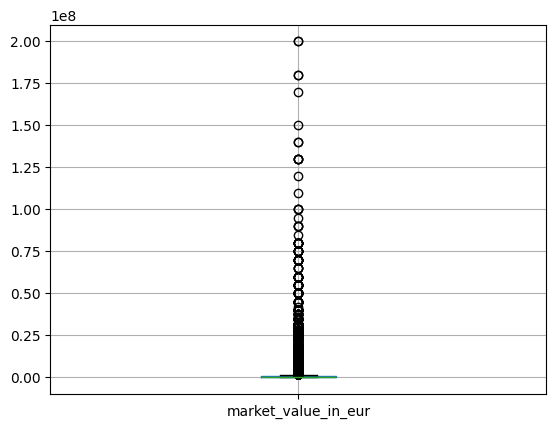

In [62]:
players.boxplot(column="market_value_in_eur")
plt.show()

Da das die Zielvariable ist, manipuliere ich hier keine Daten und entfernen NaN und falsche Werte nur. Außreißer werden in '03_EDA' behandelt

In [63]:
players = players.dropna(subset=["market_value_in_eur"])
players = players.dropna(subset=["highest_market_value_in_eur"])

In [64]:
players.market_value_in_eur.describe()

count    3.104600e+04
mean     1.641140e+06
std      6.410427e+06
min      1.000000e+04
25%      1.000000e+05
50%      2.500000e+05
75%      7.000000e+05
max      2.000000e+08
Name: market_value_in_eur, dtype: float64

In [65]:
players.highest_market_value_in_eur.describe()

count    3.104600e+04
mean     3.791080e+06
std      9.891719e+06
min      1.000000e+04
25%      3.000000e+05
50%      8.000000e+05
75%      3.000000e+06
max      2.000000e+08
Name: highest_market_value_in_eur, dtype: float64

In [67]:
players[players["market_value_in_eur"] <= 100000]

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,city_of_birth,country_of_citizenship,date_of_birth,...,total_transfer_fee,total_starting_lineups,total_substitute_appearances,total_captain_appearances,total_games,total_yellow_cards,total_red_cards,total_goals,total_assists,total_minutes_played
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,Freital,Germany,1981-03-18,...,0,8,102,0,110,0.0,0.0,0.0,0.0,1080.0
10,258,Gerald,Asamoah,Gerald Asamoah,2013,33,gerald-asamoah,Mampong,Germany,1978-10-03,...,0,0,1,0,1,2.0,0.0,0.0,2.0,1075.0
11,264,Tamás,Hajnal,Tamás Hajnal,2012,79,tamas-hajnal,Esztergom,Hungary,1981-03-15,...,0,4,5,0,9,1.0,0.0,2.0,3.0,1227.0
26,643,Christian,Vander,Christian Vander,2012,86,christian-vander,Willich,Germany,1980-10-24,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
30,735,Giuseppe,Gemiti,Giuseppe Gemiti,2013,1210,giuseppe-gemiti,Frankfurt am Main,Germany,1981-05-03,...,0,12,28,0,40,1.0,0.0,0.0,1.0,669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32583,1302421,look_last_name,João Neto,João Neto,2024,6992,joao-neto,São Paulo,Brazil,2003-02-04,...,0,0,0,0,0,0.0,0.0,0.0,0.0,197.0
32584,1306131,Fábio,Sambú,Fábio Sambú,2024,2503,fabio-sambu,Barreiro,Portugal,2007-09-06,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
32585,1306851,Hakim,Sulemana,Hakim Sulemana,2024,5724,hakim-sulemana,Techiman,Ghana,2005-02-19,...,0,0,0,0,0,1.0,0.0,1.0,2.0,161.0
32586,1309326,Jay-David,Mbalanda,Jay-David Mbalanda,2024,475,jay-david-mbalanda,Brussel,Belgium,2007-05-03,...,0,0,0,0,0,1.0,0.0,0.0,0.0,17.0


## 'number_of_transfers'